In [58]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import cmocean 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%pylab inline



Populating the interactive namespace from numpy and matplotlib


## load data to xarray, slice in time, and then convert to pandas dataframe

In [65]:

glid_path = '/home/z3526974/Work/data/Glider_data/IMOS_ANFOG_BCEOPSTUV_20170911T071056Z_SL287_FV01_timeseries_END-20171002T010328Z.nc'  

ds = xr.open_dataset(glid_path)

ts = ds.sel(TIME=slice('2017-09-16', '2017-09-24'))

df = xr.Dataset.to_dataframe(ts)

ts

<xarray.Dataset>
Dimensions:                    (TIME: 371684)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2017-09-16T00:00:01.059107072 ... 2017-09-24T23:59:59.337259776
    LATITUDE                   (TIME) float64 -32.73 -32.73 ... -33.3 -33.3
    LONGITUDE                  (TIME) float64 152.5 152.5 152.5 ... 152.1 152.1
    DEPTH                      (TIME) float64 124.5 124.8 125.2 ... 34.71 35.02
Data variables:
    PLATFORM                   |S1 ''
    DEPLOYMENT                 |S1 ''
    SENSOR1                    |S1 ''
    SENSOR2                    |S1 ''
    SENSOR3                    |S1 ''
    SENSOR4                    |S1 ''
    TIME_quality_control       (TIME) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    LATITUDE_quality_control   (TIME) float32 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0
    LONGITUDE_quality_control  (TIME) float32 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0
    HEAD                       (TIME) float64 116.1 116.1 113.2 ... 236.1 238.2
    HEAD_qual

## Plot map of track

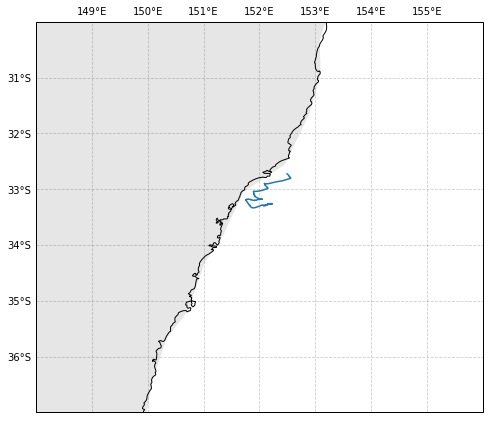

In [66]:
plt.figure(figsize=(8, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
plt.plot(ts.LONGITUDE,ts.LATITUDE,transform=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.set_extent([148, 156, -37, -30])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_bottom = False
ax1.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
ax1.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
ax1.add_feature(cfeature.BORDERS, zorder=10)

## Plot section

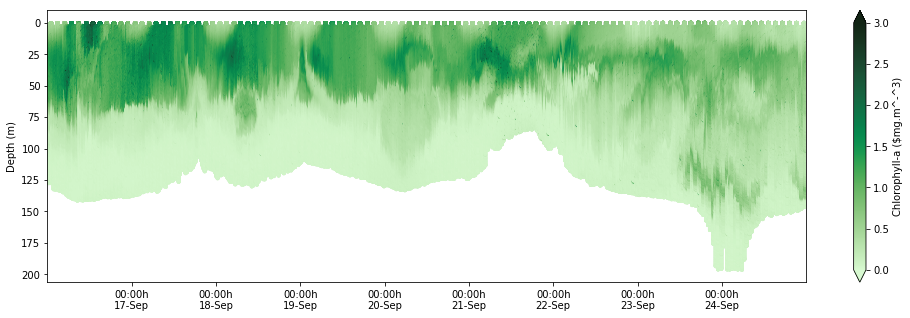

In [68]:
cmap=cmocean.cm.algae

fig, ax = plt.subplots(figsize=(17, 5))
kw = dict(s=15, c=df['CPHL'], marker='o', edgecolor='none',cmap=cmap,vmin=0,vmax=3)
cs = ax.scatter(df.index, df['DEPTH'], **kw)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel(r'Chlorophyll-a ($mg.m^-^3)')
ax.set_ylabel('Depth (m)');

savefig('SL287_glider_chla_section.png', dpi=300,bbox_inches='tight')